In [1]:
from AGMOEA import AGMOEA
from DTLZEvaluator import DTLZEvaluator
import matplotlib.pyplot as plt
import numpy as np
from pymoo.indicators.hv import HV
from pymoo.indicators.igd import IGD
from Chromosome import Chromosome
from mpl_toolkits.mplot3d import Axes3D

from pymoo.util.plotting import plot
from pymoo.visualization.scatter import Scatter

In [2]:
crossover_parameters = {
    'sbx': {'eta': 20},
    'pcx': {'sigma': 0.1, 'eta': 0.1},
    'spx': {'epsilon': 1},
    'blx_alpha': {'alpha': 0.5},
    'de_rand_1': {'cr': 1,'f': 0.5}
}

In [3]:
NP = 300
K = 5
NGBA = 10
NEXA = 300
Tmax = 250
FETmax = 30000
N = 30
M = 3
Pm = 0.5

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_values(pareto_fronts, true_pareto):
    num_rows = len(pareto_fronts)
    num_cols = 3  
    fig = plt.figure(figsize=(15, num_rows * 10))

    for i, (pareto, igd, hv) in enumerate(pareto_fronts):
        ax0 = fig.add_subplot(num_rows, num_cols, i * num_cols + 1, projection='3d')
        true_obj1 = [item[0] for item in true_pareto]
        true_obj2 = [item[1] for item in true_pareto]
        true_obj3 = [item[2] for item in true_pareto]
        obj1 = [item.objectives[0] for item in pareto]
        obj2 = [item.objectives[1] for item in pareto]
        obj3 = [item.objectives[2] for item in pareto]
        ax0.scatter(true_obj1, true_obj2, true_obj3, color='red', edgecolor='red', facecolor='none', label='True Pareto')
        ax0.scatter(obj1, obj2, obj3, color='b', label='Calculated Pareto')
        ax0.set_title(f'Pareto Front {i+1}')
        ax0.legend()
        ax0.view_init(elev=45, azim=45)
        
        ax1 = fig.add_subplot(num_rows, num_cols, i * num_cols + 2)
        ax1.plot(hv, color='r', label=f'Mean: {np.mean(hv):.2f}\nStd: {np.std(hv):.2f}')
        ax1.set_title(f'HV {i+1}')
        ax1.legend()

        ax2 = fig.add_subplot(num_rows, num_cols, i * num_cols + 3)
        ax2.plot(igd, color='g', label=f'Mean: {np.mean(igd):.2f}\nStd: {np.std(igd):.2f}')
        ax2.set_title(f'IGD {i+1}')
        ax2.legend()

    plt.tight_layout()
    plt.show()


In [10]:
def run(num_run, problem_name, Pm = 0.5):
    evaluator = DTLZEvaluator(problem_name, N,M)
    pareto_fronts = []
    for i in range(num_run):
        agmoea = AGMOEA(NP, K, NGBA, NEXA, Tmax, FETmax, evaluator, crossover_parameters, i*0.1, N, M)
        agmoea.agmoea_algorithm()
        pareto_fronts.append((agmoea.EXA, agmoea.igd_values, agmoea.hypervolume_values))
        
    plot_values(pareto_fronts,agmoea.true_pareto)

C:\Users\pars iran\AppData\Local\Temp\ipykernel_5264\860110749.py:17: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax0.scatter(true_obj1, true_obj2, true_obj3, color='red', edgecolor='red', facecolor='none', label='True Pareto')
C:\Users\pars iran\AppData\Local\Temp\ipykernel_5264\860110749.py:18: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax0.scatter(obj1, obj2, obj3, color='b', label='Calculated Pareto')


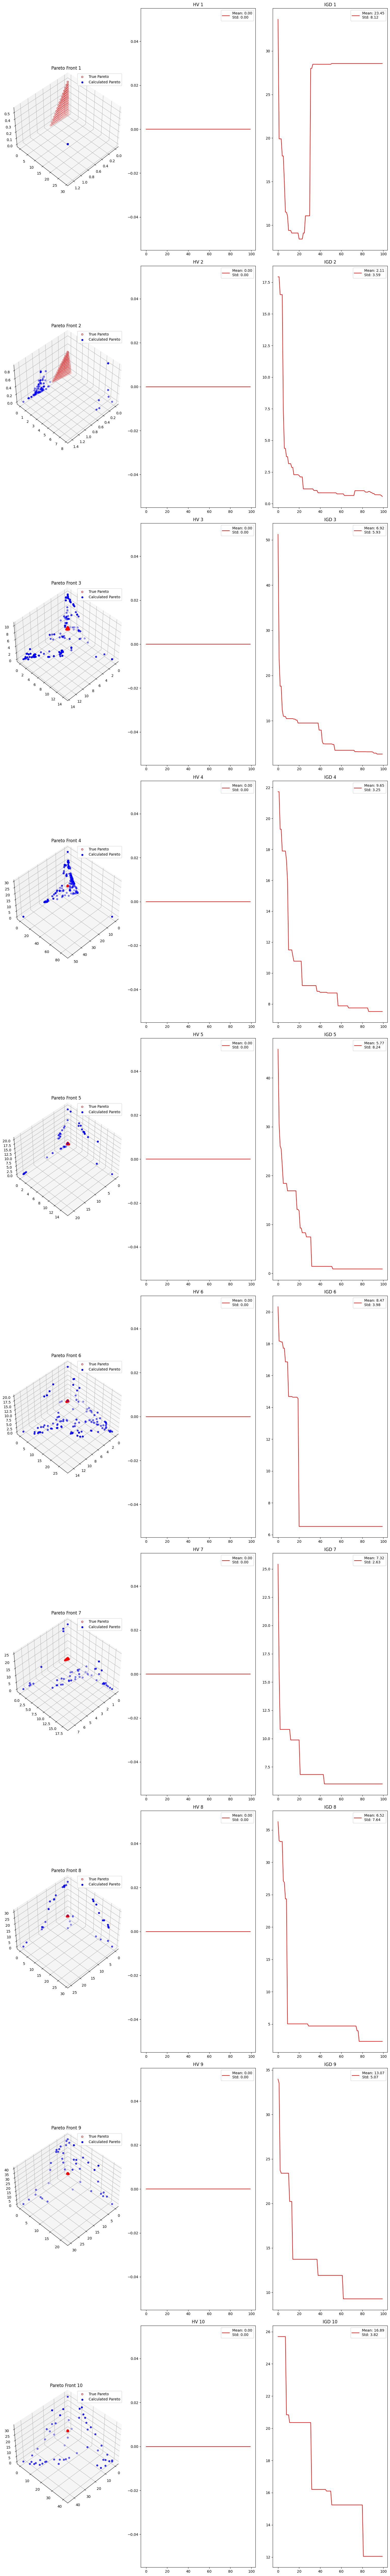

In [11]:
run(10, 'dtlz1',0.2) 

C:\Users\pars iran\AppData\Local\Temp\ipykernel_5264\860110749.py:17: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax0.scatter(true_obj1, true_obj2, true_obj3, color='red', edgecolor='red', facecolor='none', label='True Pareto')
C:\Users\pars iran\AppData\Local\Temp\ipykernel_5264\860110749.py:18: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use none, you no longer need to clean a Grouper instead.
  ax0.scatter(obj1, obj2, obj3, color='b', label='Calculated Pareto')


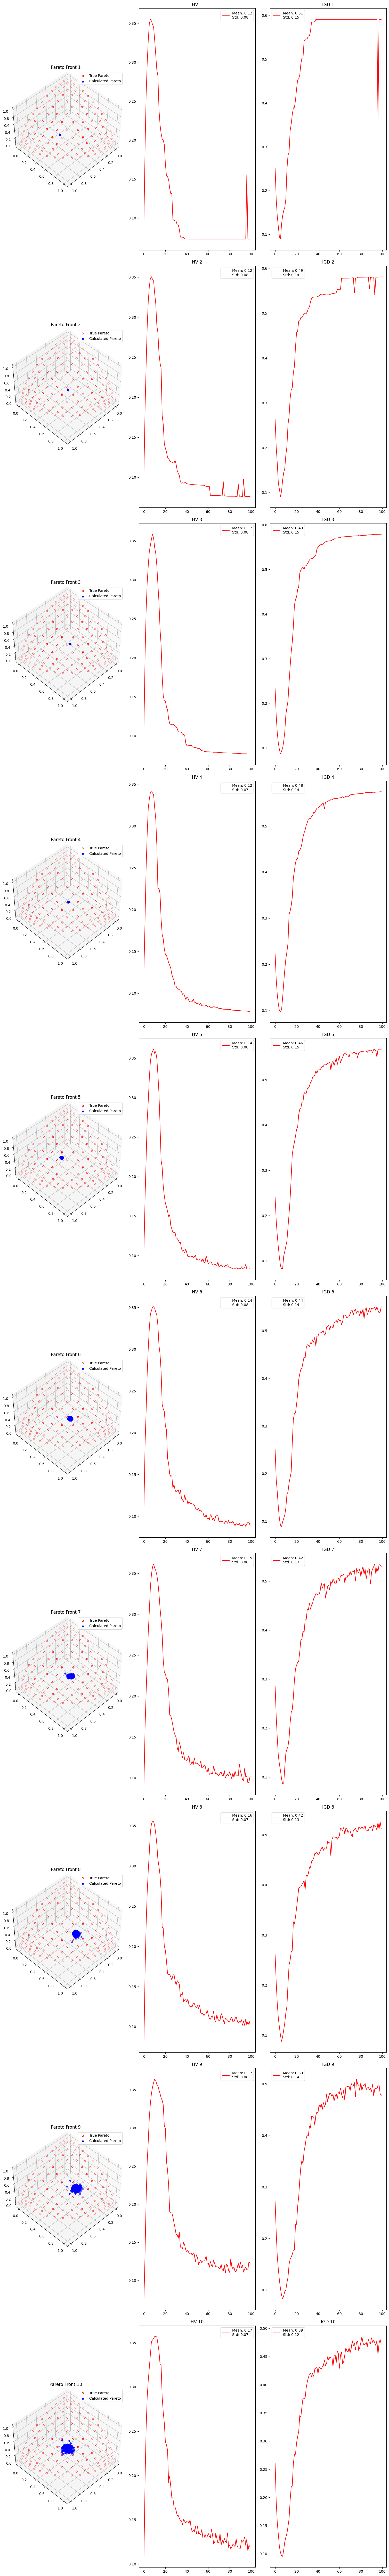

In [12]:
run(10, 'dtlz2')